# Austin simulation env

##### This notebook is to create a simulation environment for the ride-hailing simulation in Austin, Texas

##### Import packages

In [1]:
import gym
import folium
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from h3 import h3
from folium.plugins import HeatMap
from sklearn.neighbors import KernelDensity
from math import radians, sin, cos, asin, sqrt # to calculate distance

%matplotlib inline

C:\Users\zhh\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Part 1, Vlisualize the location data

In [42]:
dataset = pd.read_csv("../dataset/all_data.csv")
dataset.head()
#sampled_dataset = dataset.sample(frac=0.05, random_state=1)
#sampled_dataset

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,RIDE_ID,started_on,created_date,updated_date,completed_on,distance_travelled,...,DAILYMaximumDryBulbTemp,DAILYMinimumDryBulbTemp,DAILYDeptFromNormalAverageTemp,DAILYAverageRelativeHumidity,DAILYSunrise,DAILYSunset,DAILYPrecip,DAILYAverageWindSpeed,DAILYPeakWindSpeed,zip_start_location
257541,261709,265401,265401,573053,573053,2016-12-12 00:01:28+00:00,2016-12-12 00:01:21+00:00,2016-12-12 00:29:34+00:00,2016-12-12 00:05:37+00:00,2031.0,...,NaN,NaN,NaN,NaN,719.0,1732.0,NaN,NaN,NaN,NaN
257547,261715,265407,265407,573059,573059,2016-12-12 00:02:51+00:00,2016-12-12 00:01:17+00:00,2016-12-12 00:10:50+00:00,2016-12-12 00:09:46+00:00,2543.0,...,NaN,NaN,NaN,NaN,719.0,1732.0,NaN,NaN,NaN,NaN
257551,261719,265411,265411,573063,573063,2016-12-12 00:04:18+00:00,2016-12-12 00:00:34+00:00,2016-12-12 00:08:17+00:00,2016-12-12 00:07:55+00:00,1189.0,...,NaN,NaN,NaN,NaN,719.0,1732.0,NaN,NaN,NaN,NaN
257553,261721,265413,265413,573065,573065,2016-12-12 00:04:30+00:00,2016-12-12 00:01:26+00:00,2016-12-12 00:25:35+00:00,2016-12-12 00:18:02+00:00,5579.0,...,NaN,NaN,NaN,NaN,719.0,1732.0,NaN,NaN,NaN,NaN
257554,261722,265414,265414,573066,573066,2016-12-12 00:04:32+00:00,2016-12-12 00:02:33+00:00,2016-12-12 00:11:59+00:00,2016-12-12 00:10:37+00:00,2176.0,...,NaN,NaN,NaN,NaN,719.0,1732.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273109,277552,281481,281481,589144,589144,2016-12-16 00:10:37+00:00,2016-12-15 23:58:46+00:00,2016-12-16 00:42:10+00:00,2016-12-16 00:35:32+00:00,13632.0,...,NaN,NaN,NaN,NaN,721.0,1733.0,NaN,NaN,NaN,NaN
273110,277553,281482,281482,589145,589145,2016-12-16 00:10:40+00:00,2016-12-15 23:58:31+00:00,2016-12-16 00:36:28+00:00,2016-12-16 00:35:34+00:00,10490.0,...,NaN,NaN,NaN,NaN,721.0,1733.0,NaN,NaN,NaN,NaN
273129,277572,281501,281501,589164,589164,2016-12-16 00:15:46+00:00,2016-12-15 23:56:34+00:00,2016-12-17 00:27:04+00:00,2016-12-16 00:26:58+00:00,5014.0,...,NaN,NaN,NaN,NaN,721.0,1733.0,NaN,NaN,NaN,NaN
273172,277615,281546,281546,589209,589209,2016-12-16 00:21:43+00:00,2016-12-15 23:57:19+00:00,2016-12-16 07:56:47+00:00,2016-12-16 00:51:33+00:00,7177.0,...,NaN,NaN,NaN,NaN,721.0,1733.0,NaN,NaN,NaN,NaN


In [95]:
dataset['created_date'] = pd.to_datetime(dataset['created_date'])
start_date = '2016-11-23'
end_date = '2016-11-24'
filtered_df = dataset[(dataset['created_date'] >= start_date) & (dataset['created_date'] <= end_date)]
filtered_df

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,RIDE_ID,started_on,created_date,updated_date,completed_on,distance_travelled,...,DAILYMaximumDryBulbTemp,DAILYMinimumDryBulbTemp,DAILYDeptFromNormalAverageTemp,DAILYAverageRelativeHumidity,DAILYSunrise,DAILYSunset,DAILYPrecip,DAILYAverageWindSpeed,DAILYPeakWindSpeed,zip_start_location
158348,160813,162935,162935,470515,470515,2016-11-23 00:04:20+00:00,2016-11-23 00:00:16+00:00,2016-11-24 00:13:17+00:00,2016-11-23 00:13:15+00:00,2234.0,...,NaN,NaN,NaN,NaN,704.0,1731.0,NaN,NaN,NaN,NaN
158352,160817,162939,162939,470519,470519,2016-11-23 00:04:41+00:00,2016-11-23 00:00:04+00:00,2016-11-24 00:21:08+00:00,2016-11-23 00:21:04+00:00,4917.0,...,NaN,NaN,NaN,NaN,704.0,1731.0,NaN,NaN,NaN,NaN
158354,160819,162941,162941,470521,470521,2016-11-23 00:05:43+00:00,2016-11-23 00:01:47+00:00,2016-11-23 00:20:50+00:00,2016-11-23 00:20:28+00:00,7353.0,...,NaN,NaN,NaN,NaN,704.0,1731.0,NaN,NaN,NaN,NaN
158357,160822,162944,162944,470524,470524,2016-11-23 00:06:41+00:00,2016-11-23 00:06:25+00:00,2016-11-23 00:07:13+00:00,2016-11-23 00:06:54+00:00,51.0,...,NaN,NaN,NaN,NaN,704.0,1731.0,NaN,NaN,NaN,NaN
158358,160823,162945,162945,470525,470525,2016-11-23 00:07:19+00:00,2016-11-23 00:00:07+00:00,2016-11-23 00:25:23+00:00,2016-11-23 00:24:59+00:00,5260.0,...,NaN,NaN,NaN,NaN,704.0,1731.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162054,164597,166783,166783,474365,474365,2016-11-24 00:10:58+00:00,2016-11-23 23:56:19+00:00,2016-11-27 04:37:37+00:00,2016-11-24 00:15:52+00:00,2267.0,...,NaN,NaN,NaN,NaN,705.0,1731.0,NaN,NaN,NaN,NaN
162055,164598,166784,166784,474366,474366,2016-11-24 00:11:11+00:00,2016-11-23 23:52:02+00:00,2016-11-24 01:22:46+00:00,2016-11-24 00:30:25+00:00,9180.0,...,NaN,NaN,NaN,NaN,705.0,1731.0,NaN,NaN,NaN,NaN
162070,164615,166801,166801,474383,474383,2016-11-24 00:15:32+00:00,2016-11-23 23:58:28+00:00,2016-11-24 00:44:50+00:00,2016-11-24 00:33:17+00:00,17388.0,...,NaN,NaN,NaN,NaN,705.0,1731.0,NaN,NaN,NaN,NaN
162083,164628,166814,166814,474396,474396,2016-11-24 00:19:13+00:00,2016-11-23 23:58:39+00:00,2016-11-24 00:48:08+00:00,2016-11-24 00:36:29+00:00,16553.0,...,NaN,NaN,NaN,NaN,705.0,1731.0,NaN,NaN,NaN,NaN


In [96]:
demand_time = filtered_df['created_date']
demand_time_hr = demand_time.dt.hour
demand_time_hr


158348     0
158352     0
158354     0
158357     0
158358     0
          ..
162054    23
162055    23
162070    23
162083    23
162104    21
Name: created_date, Length: 3678, dtype: int64

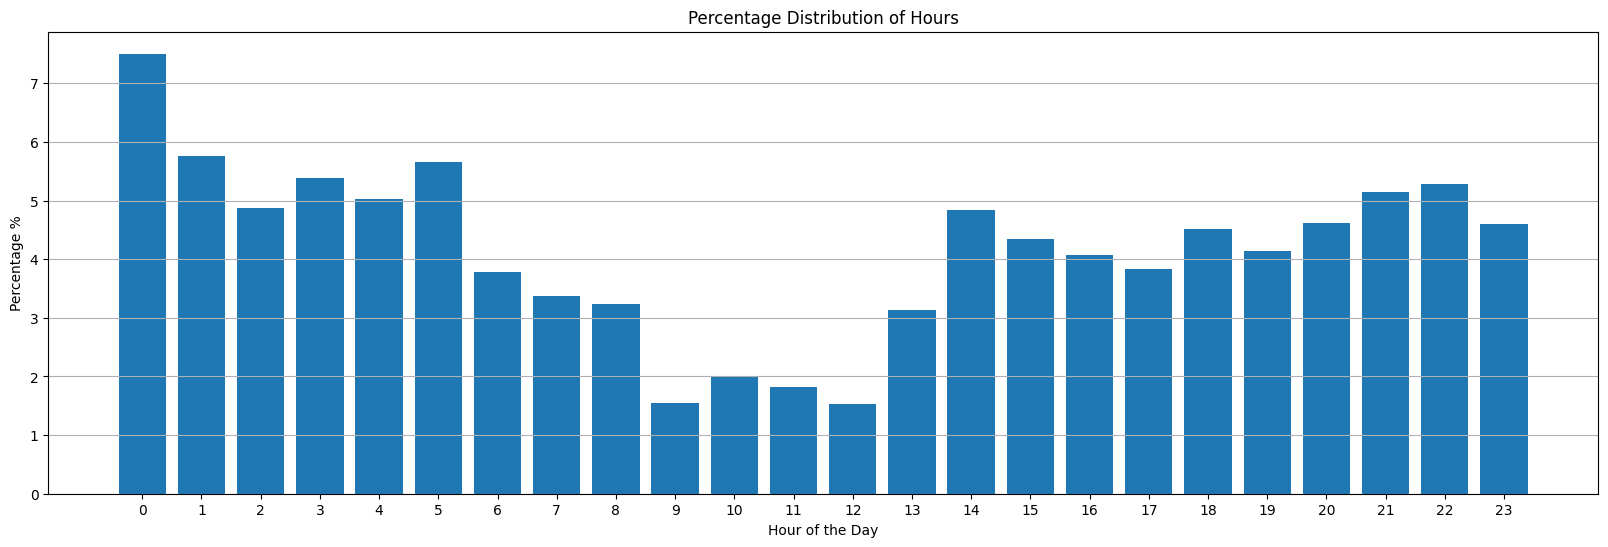

In [97]:
# 计算每个小时出现的频率
hour_counts = demand_time_hr.value_counts(normalize=True).sort_index()

# 将频率转换为百分比
hour_percentage = hour_counts * 100

# 绘制百分比分布图
plt.figure(figsize=(20, 6))
plt.bar(hour_percentage.index, hour_percentage.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Percentage %')
plt.title('Percentage Distribution of Hours')
plt.xticks(range(24))  # 显示0到23的每个小时
plt.grid(axis='y')

# 显示图表
plt.show()

In [90]:
start_loc = dataset[["RIDE_ID", "started_on", "start_location_lat", "start_location_long"]]
start_loc.head()

,RIDE_ID,started_on,start_location_lat,start_location_long
0,307339,2016-10-27 12:24:46+00:00,30.291,-97.740
1,307340,2016-10-27 12:25:05+00:00,30.297,-97.704
2,307343,2016-10-27 12:28:03+00:00,30.323,-97.677
3,307350,2016-10-27 12:32:01+00:00,30.271,-97.728
4,307351,2016-10-27 12:32:33+00:00,30.289,-97.748


In [91]:
end_loc = dataset[["RIDE_ID", "completed_on", "end_location_lat", "end_location_long"]]
end_loc.head()

,RIDE_ID,completed_on,end_location_lat,end_location_long
0,307339,2016-10-27 12:48:47+00:00,30.188,-97.663
1,307340,2016-10-27 12:37:26+00:00,30.269,-97.743
2,307343,2016-10-27 12:58:13+00:00,30.245,-97.849
3,307350,2016-10-27 12:39:44+00:00,30.322,-97.710
4,307351,2016-10-27 12:37:50+00:00,30.284,-97.739


Adjust and generate dataset for different time-steps

In [92]:
test_data = end_loc.copy()

test_data['completed_on'] = pd.to_datetime(test_data['completed_on'])
test_data['completed_on'] = test_data['completed_on'].dt.time

start_time = datetime.datetime.strptime('00:00:00', '%H:%M:%S')
end_time = start_time + datetime.timedelta(minutes=60)
start_time_f = start_time.time()
end_time_f = end_time.time()
data_slice = test_data[(test_data['completed_on'] >= start_time_f) & (test_data['completed_on'] <= end_time_f)]

data_slice.head(5)

,RIDE_ID,completed_on,end_location_lat,end_location_long
1888,309324,00:01:23,30.480,-97.809
1895,309331,00:02:04,30.391,-97.839
1903,309340,00:00:48,30.203,-97.668
1936,309373,00:35:25,30.255,-97.735
1945,309382,00:06:08,30.471,-97.796


In [93]:
test_time = datetime.datetime.strptime('23:00:00', '%H:%M:%S')
#test_time_next = test_time + datetime.timedelta(minutes=60)
test_time_time = test_time.time()
test_time_back = datetime.datetime.strptime(str(test_time_time), '%H:%M:%S')

print(test_time_back)

time_debug = datetime.datetime.strptime('1900-01-02 00:00:00', '%Y-%m-%d %H:%M:%S') - datetime.timedelta(minutes=20)

print(time_debug)

1900-01-01 23:00:00
1900-01-01 23:40:00


In [94]:
def add_step_info(data, keyword='started_on', step_size=60):
    # keyword: which column contains time data, step_size: how many minuetes per time step
    step_dataset = data.copy()
    step_dataset[f'{keyword}'] = pd.to_datetime(step_dataset[f'{keyword}'])
    step_dataset[f'{keyword}'] = step_dataset[f'{keyword}'].dt.time
    step_dataset.insert(step_dataset.shape[1], 'time_step_index', 1)
    number_step = int(1440 / step_size)

    start_time = datetime.datetime.strptime('00:00:00', '%H:%M:%S')
    time_debug = datetime.datetime.strptime('1900-01-02 00:00:00', '%Y-%m-%d %H:%M:%S') - datetime.timedelta(minutes=step_size)

    for i in range(number_step):
        if start_time == time_debug:
            end_time = start_time + datetime.timedelta(minutes=step_size) - datetime.timedelta(seconds=1)
        else:
            end_time = start_time + datetime.timedelta(minutes=step_size)
        start_time_f = start_time.time()
        end_time_f = end_time.time()
        step_index = i + 1
        step_dataset.loc[(step_dataset[f'{keyword}'] > start_time_f) & (step_dataset[f'{keyword}'] <= end_time_f), 'time_step_index'] = step_index
        start_time = datetime.datetime.strptime(str(end_time_f), '%H:%M:%S')
    
    return step_dataset

In [95]:
rider_dataset_hr = add_step_info(start_loc, keyword='started_on', step_size=60)
driver_dataset_hr = add_step_info(end_loc, keyword='completed_on', step_size=60)

In [96]:
rider_dataset_hr.sample(5)
# time step index: 1 means 0:00 - 1:00, 5 means 4:00 - 5:00, etc.

,RIDE_ID,started_on,start_location_lat,start_location_long,time_step_index
286647,603138,22:01:17,30.230,-97.824,23
396560,717590,17:42:21,30.322,-97.697,18
310237,627680,04:25:19,30.290,-97.742,5
126357,437567,03:02:38,30.341,-97.706,4
551434,877556,08:21:59,30.265,-97.732,9


In [97]:
print(rider_dataset_hr[rider_dataset_hr['time_step_index']==0].shape)
print(driver_dataset_hr[rider_dataset_hr['time_step_index']==24].shape)

(0, 5)
(63016, 5)


##### draw heat map for start and end locations

In [98]:
def show_heatmap(coord_data, keyword='start_location', zoom=9, data_format='dataframe'):
    m = folium.Map(location=(30.2672, -97.7431), zoom_start=zoom)
    if data_format == 'dataframe':
        data = list(coord_data.groupby([f'{keyword}_lat', f'{keyword}_long']).groups.keys())
    if data_format == 'ndarray':
        data = coord_data
    heatmap = HeatMap(data, radius=14)
    heatmap.add_to(m)
    return m

In [99]:
start_loc_hm = show_heatmap(start_loc, keyword='start_location', zoom=11)
start_loc_hm

In [100]:
end_loc_hm = show_heatmap(end_loc, keyword='end_location', zoom=11)
end_loc_hm

##### draw 1-dimentional distribution plot for latitude and longitude data

In [101]:
def draw_hist(data, title):
    plt.figure(figsize=(15,2))
    plt.hist(data, density=True, bins=500) 
    plt.ylabel('Probability')
    plt.xlabel('Data')
    plt.title(title)
    plt.grid()
    plt.show()

def draw_scatter(data, keyword, title, sample_plot=True, sample_scale=1000, get_sample=False):
    fig = plt.figure(figsize=(10,7))
    if sample_plot == True:
        sample_idx = np.random.choice(data.shape[0], sample_scale, replace=False)
        sampled_reverse = data.loc[sample_idx]
        sampled_data = sampled_reverse[[f'{keyword}_lat', f'{keyword}_long']]
        plt.scatter(sampled_data[f'{keyword}_lat'], sampled_data[f'{keyword}_long'], alpha=0.7)
    else:
        plt.scatter(data[f'{keyword}_lat'], data[f'{keyword}_long'], alpha=0.7)
    plt.ylabel('Probability')
    plt.xlabel('Data')
    plt.title(title)
    plt.grid() 
    plt.show()
    if get_sample == True:
        return sampled_data


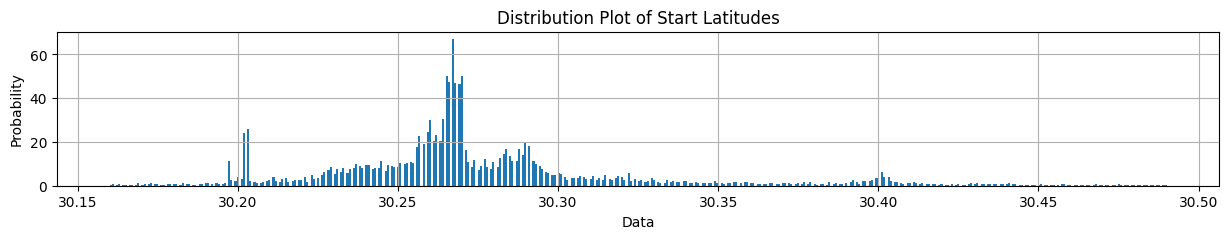

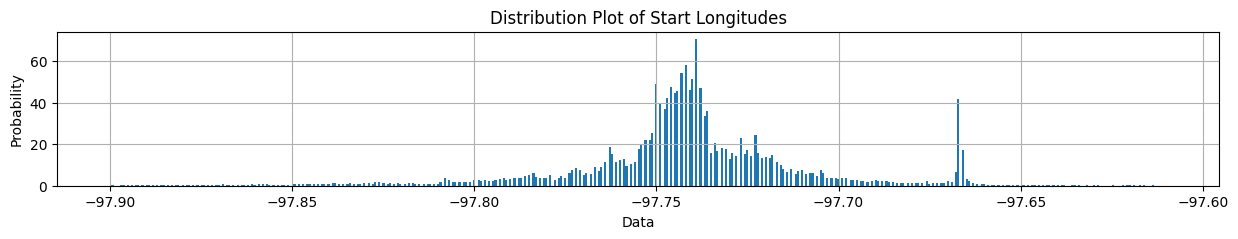

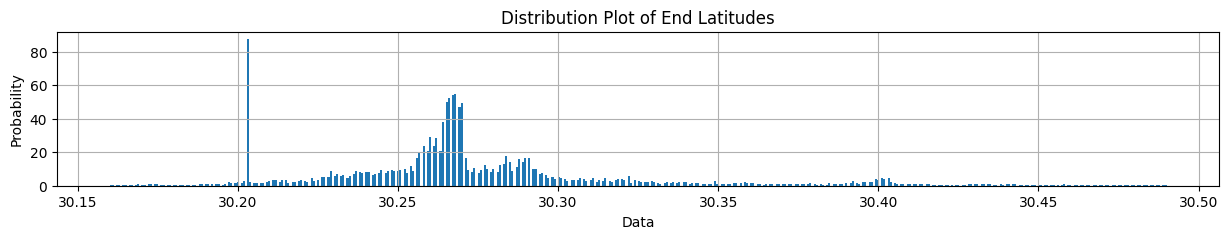

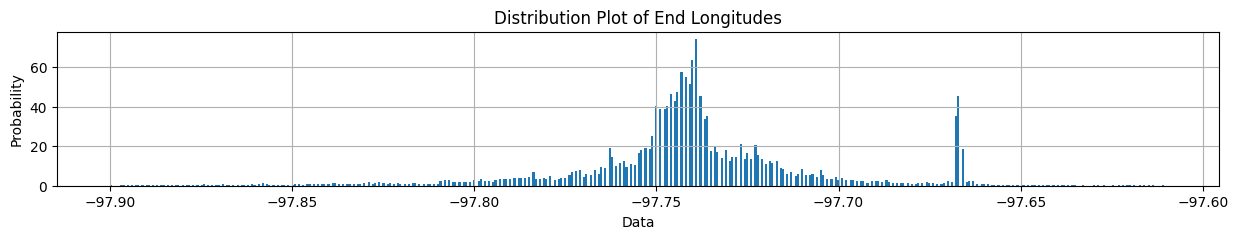

In [102]:
draw_hist(start_loc.start_location_lat, "Distribution Plot of Start Latitudes")
draw_hist(start_loc.start_location_long, "Distribution Plot of Start Longitudes")
draw_hist(end_loc.end_location_lat, "Distribution Plot of End Latitudes")
draw_hist(end_loc.end_location_long, "Distribution Plot of End Longitudes")

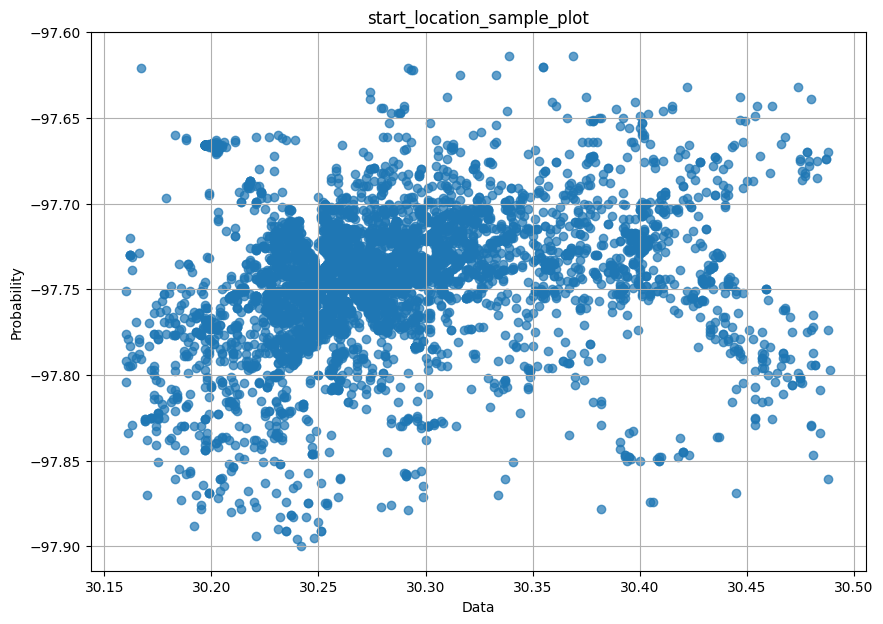

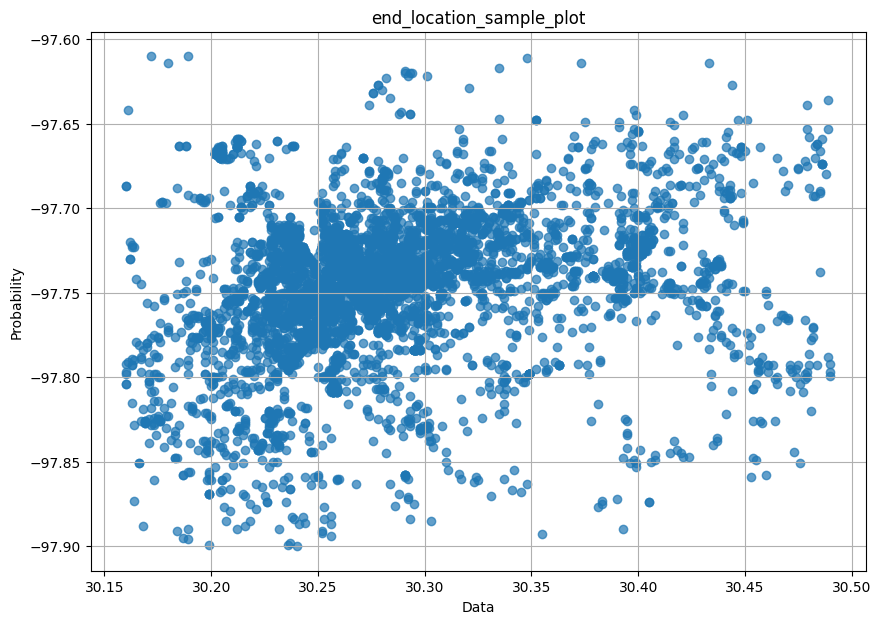

In [103]:
sampled_start_loc = draw_scatter(start_loc,'start_location', 'start_location_sample_plot', sample_scale=10000, get_sample=True)
sampled_end_loc = draw_scatter(end_loc,'end_location', 'end_location_sample_plot', sample_scale=10000, get_sample=True)

### Part 2, Fit the coordinate data with a probability distribution

##### Use Kernel Density Estimator (KDE) to best fit the data

##### try to get the best bandwidth, now 0.0035

In [104]:
def sample_from_model(model, num_sample=1000):
    sample = model.sample(num_sample)
    sample_df = pd.DataFrame(sample, columns=['sampled_location_lat', 'sampled_location_long'])
    return sample_df

def fit_model(data, keyword, band_width=0.0035):
    # keyword: 'driver' or 'rider'
    model_set = {}

    if keyword == 'driver':
        index_key = 'end_location'
    else:
        index_key = 'start_location'

    for time in range(1,25):
        data_hr = data[data["time_step_index"]==time]
        xy_train  = np.vstack([data_hr[f'{index_key}_lat'], data_hr[f'{index_key}_long']]).T
        kde_skl = KernelDensity(kernel='gaussian', bandwidth=band_width)
        model_set[f'{time}'] = kde_skl.fit(xy_train)

    return model_set

In [105]:
rider_model = fit_model(rider_dataset_hr, keyword='rider')
driver_model = fit_model(driver_dataset_hr, keyword='driver')

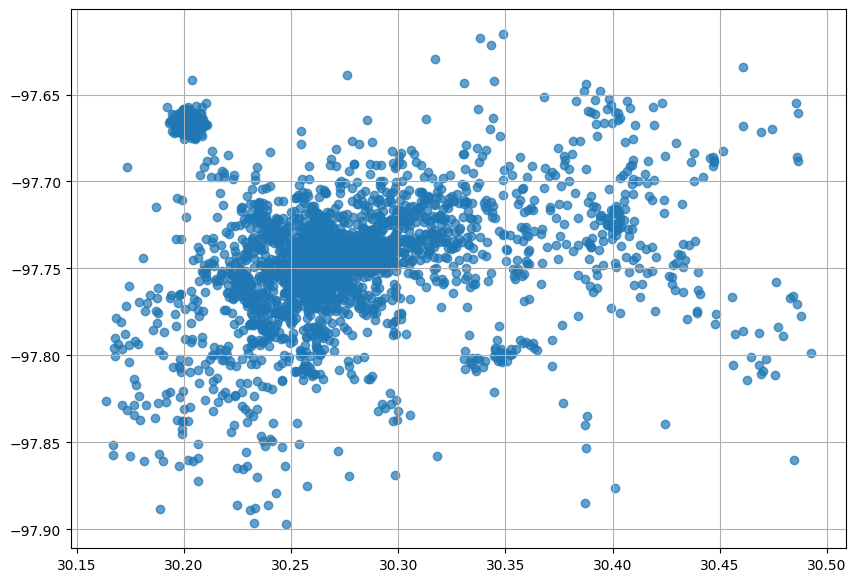

In [106]:
# Test the fitted model
sample = sample_from_model(rider_model['23'], 3000)
fig = plt.figure(figsize=(10,7))
plt.scatter(sample[f'sampled_location_lat'], sample[f'sampled_location_long'], alpha=0.7)
plt.grid()
plt.show()

### Part 3, Test and learn how to write a environmrnt

In [21]:
"""import gym
import pygame
from gym import spaces
import numpy as np"""

'import gym\nimport pygame\nfrom gym import spaces\nimport numpy as np'

In [22]:
"""class CliffWalkingEnv(gym.Env):
    metadata = {"render_modes": ["human", "rgb_array"],     
                "render_fps": 500,}                         

    def __init__(self, render_mode=None, map_size=(4,12), pix_square_size=20):
        self.pix_square_size = pix_square_size  
        self.nrow = map_size[0]
        self.ncol = map_size[1]
        self.start_location = np.array([0, self.nrow-1], dtype=int)
        self.target_location = np.array([self.ncol-1, self.nrow-1], dtype=int)

        # observation space
        self.observation_space = spaces.Dict(
            {
                "agent": spaces.MultiDiscrete([self.ncol, self.nrow]),
                "target": spaces.MultiDiscrete([self.ncol, self.nrow]),
            }
        )

        # scale of action spaces, 5 actions: not move, right, down, left, up
        self.action_space = spaces.Discrete(5)

        # define how action is applied 
        self._action_to_direction = {
            0: np.array([0, 0]),    # noop
            1: np.array([1, 0]),    # right
            2: np.array([0, 1]),    # down
            3: np.array([-1, 0]),   # left
            4: np.array([0, -1]),   # up
        }

        # render moide
        assert render_mode is None or render_mode in self.metadata["render_modes"]
        self.render_mode = render_mode

        # render body
        self.window = None
        self.clock = None

    def _get_obs(self):
        return {"agent": self._agent_location, "target": self._target_location}

    def _get_info(self):
        return {"distance": np.linalg.norm(self._agent_location - self._target_location, ord=1)} # 附加信息定义为 agent 当前位置到 target 的曼哈顿距离

    def _state_transition(self, state, action):
        direction = self._action_to_direction[action]
        state += direction
        state[0] = np.clip(state[0], 0, self.ncol-1).item()
        state[1] = np.clip(state[1], 0, self.nrow-1).item()
        return state

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)

        self._agent_location = self.start_location.copy()
        self._target_location = self.target_location.copy()

        observation = self._get_obs()
        info = self._get_info()

        return observation, info

    def step(self, action):
        self._agent_location = self._state_transition(self._agent_location, action)

        terminated = np.array_equal(self._agent_location, self._target_location)
        truncated = self._agent_location[1].item() == self.nrow - 1 and self._agent_location[0].item() not in [0, self.ncol-1]
        reward = -1
        if terminated: reward = 0
        if truncated: reward = -100
        
        observation = self._get_obs()
        info = self._get_info()

        return observation, reward, terminated, truncated, info

    def render(self, state_values=None, policy=None):
        if self.render_mode == "rgb_array":
            return self._render_frame()                 
        elif self.render_mode == "human":
            self._render_frame(state_values, policy)    
        else:
            raise False                                 

    def _render_frame(self, state_values=None, policy=None):
        pix_square_size = self.pix_square_size
        canvas = pygame.Surface((self.ncol*pix_square_size, self.nrow*pix_square_size))
        canvas.fill((255, 255, 255))

        if self.window is None and self.render_mode == "human":
            pygame.init()
            pygame.display.init()
            self.window = pygame.display.set_mode((self.ncol*pix_square_size, self.nrow*pix_square_size))
        if self.clock is None and self.render_mode == "human":
            self.clock = pygame.time.Clock()

        pygame.draw.rect(
            canvas,
            (255, 255, 255),
            pygame.Rect(
                (0, 0),
                (pix_square_size*self.ncol, pix_square_size*self.nrow),
            ),
        )
        if self.render_mode == "human" and isinstance(state_values, np.ndarray):
            for col in range(self.ncol):
                for row in range(self.nrow-1):
                    state_value = state_values[row][col].item()
                    max_value = 1 if np.abs(state_values).max() == 0 else np.abs(state_values).max()
                    pygame.draw.rect(
                        canvas,
                        (abs(state_value)/max_value*255, 20, 20),          # 通过颜色反映 state value
                        pygame.Rect(
                            (col*pix_square_size, row*pix_square_size),
                            (pix_square_size-1, pix_square_size-1), # 每个状态格边长减小1，这样自动出现缝线
                        ),
                    )
        else:
            for col in range(self.ncol):
                for row in range(self.nrow-1):
                    pygame.draw.rect(
                        canvas,
                        (150, 150, 150),                  
                        pygame.Rect(
                            (col*pix_square_size, row*pix_square_size),
                            (pix_square_size-1, pix_square_size-1),
                        ),
                    )

        for col in range(self.ncol):
            if col == 0:
                color = (100, 100, 100) 
            elif col == self.ncol-1:
                color = (100, 150, 100) 
            else:  
                color = (0, 0, 0)    
            pygame.draw.rect(
                    canvas,
                    color,
                    pygame.Rect(
                        (col*pix_square_size, (self.nrow-1)*pix_square_size),
                        (pix_square_size-1, pix_square_size-1),
                    ),
                )
    
        pygame.draw.circle(
            canvas,
            (0, 0, 255),
            (self._agent_location + 0.5) * pix_square_size,
            pix_square_size / 3,
        )

        if self.render_mode == "human" and isinstance(policy, np.ndarray):
            for col in range(self.ncol):
                for row in range(self.nrow-1):
                    hash_position = col*self.nrow + row
                    actions = policy[hash_position]
                    for a in actions:
                        s_ = self._state_transition(np.array([col,row]), a)
                        if (s_ != np.array([col,row])).sum() != 0:
                            start = np.array([col*pix_square_size+0.5*pix_square_size,row*pix_square_size+0.5*pix_square_size])
                            end = s_*pix_square_size+0.5*pix_square_size
                            dot_num = 15
                            for i in range(dot_num):
                                pygame.draw.rect(
                                    canvas,
                                    (10, 255-i*175/dot_num, 10),
                                    pygame.Rect(
                                        start + (end-start) * i/dot_num,
                                        (2,2)
                                    ),
                                )

            col, row = 0, self.nrow-1
            hash_position = col*self.nrow + row
            actions = policy[hash_position]
            for a in actions:
                s_ = self._state_transition(np.array([col,row]), a)
                if (s_ != np.array([col,row])).sum() != 0:
                    start = np.array([col*pix_square_size+0.5*pix_square_size,row*pix_square_size+0.5*pix_square_size])
                    end = s_*pix_square_size+0.5*pix_square_size
                    dot_num = 15
                    for i in range(dot_num):
                        pygame.draw.rect(
                            canvas,
                            (10, 255-i*175/dot_num, 10),
                            pygame.Rect(
                                start + (end-start) * i/dot_num,
                                (2,2)
                            ),
                        )

        if self.render_mode == "human":
            # The following line copies our drawings from `canvas` to the visible window
            self.window.blit(canvas, canvas.get_rect())
            pygame.event.pump()
            pygame.display.update()

            # We need to ensure that human-rendering occurs at the predefined framerate.
            # The following line will automatically add a delay to keep the framerate stable.
            self.clock.tick(self.metadata["render_fps"])
        
        else: 
            return np.transpose(np.array(pygame.surfarray.pixels3d(canvas)), axes=(1, 0, 2))
    
    def close(self):
        if self.window is not None:
            pygame.display.quit()
            pygame.quit()"""

'class CliffWalkingEnv(gym.Env):\n    metadata = {"render_modes": ["human", "rgb_array"],     \n                "render_fps": 500,}                         \n\n    def __init__(self, render_mode=None, map_size=(4,12), pix_square_size=20):\n        self.pix_square_size = pix_square_size  \n        self.nrow = map_size[0]\n        self.ncol = map_size[1]\n        self.start_location = np.array([0, self.nrow-1], dtype=int)\n        self.target_location = np.array([self.ncol-1, self.nrow-1], dtype=int)\n\n        # observation space\n        self.observation_space = spaces.Dict(\n            {\n                "agent": spaces.MultiDiscrete([self.ncol, self.nrow]),\n                "target": spaces.MultiDiscrete([self.ncol, self.nrow]),\n            }\n        )\n\n        # scale of action spaces, 5 actions: not move, right, down, left, up\n        self.action_space = spaces.Discrete(5)\n\n        # define how action is applied \n        self._action_to_direction = {\n            0: np.arr

In [23]:
"""from gym.utils.play import play
from gym.utils.env_checker import check_env


map_size = (4,12)
env = CliffWalkingEnv(render_mode='rgb_array', 
					map_size=map_size, 
					pix_square_size=30) 	# 手动交互时渲染模式必须设置为 rgb_array 
print(check_env(env.unwrapped)) 			# 检查 base 环境是否符合 gym 规范
env.action_space.seed(42)					# 设置所有随机种子
observation, info = env.reset(seed=42)

# env.step() 后，env.render() 前的回调函数，可用来处理刚刚 timestep 中的运行信息
def palyCallback(obs_t, obs_tp1, action, rew, terminated, truncated, info): 
    # 非 noop 动作，打印 reward 和附加 info
    if action != 0: 
        print(rew, info)

# key-action 映射关系 
mapping = {(pygame.K_UP,): 4, 
            (pygame.K_DOWN,): 2, 
            (pygame.K_LEFT,): 3, 
            (pygame.K_RIGHT,): 1}
        
# 开始手动交互
play(env, keys_to_action=mapping, callback=palyCallback, fps=15, noop=0)

env.close()"""

"from gym.utils.play import play\nfrom gym.utils.env_checker import check_env\n\n\nmap_size = (4,12)\nenv = CliffWalkingEnv(render_mode='rgb_array', \n\t\t\t\t\tmap_size=map_size, \n\t\t\t\t\tpix_square_size=30) \t# 手动交互时渲染模式必须设置为 rgb_array \nprint(check_env(env.unwrapped)) \t\t\t# 检查 base 环境是否符合 gym 规范\nenv.action_space.seed(42)\t\t\t\t\t# 设置所有随机种子\nobservation, info = env.reset(seed=42)\n\n# env.step() 后，env.render() 前的回调函数，可用来处理刚刚 timestep 中的运行信息\ndef palyCallback(obs_t, obs_tp1, action, rew, terminated, truncated, info): \n    # 非 noop 动作，打印 reward 和附加 info\n    if action != 0: \n        print(rew, info)\n\n# key-action 映射关系 \nmapping = {(pygame.K_UP,): 4, \n            (pygame.K_DOWN,): 2, \n            (pygame.K_LEFT,): 3, \n            (pygame.K_RIGHT,): 1}\n        \n# 开始手动交互\nplay(env, keys_to_action=mapping, callback=palyCallback, fps=15, noop=0)\n\nenv.close()"

### Part 4, Define the simulation enviroment for matching radius here

In [24]:
np.array(300*np.ones(30), dtype=int)

array([300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300,
       300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300,
       300, 300, 300, 300])

#### Draw the hex bins for the map use h3geo

In [107]:
def visualize_hexagons(hexagons, color="red", folium_map=None):
    """
    hexagons is a list of hexcluster. Each hexcluster is a list of hexagons. 
    eg. [[hex1, hex2], [hex3, hex4]]
    """
    polylines = []
    lat = []
    lng = []
    for hex in hexagons:
        polygons = h3.h3_set_to_multi_polygon([hex], geo_json=False)
        # flatten polygons into loops.
        outlines = [loop for polygon in polygons for loop in polygon]
        polyline = [outline + [outline[0]] for outline in outlines][0]
        lat.extend(map(lambda v:v[0],polyline))
        lng.extend(map(lambda v:v[1],polyline))
        polylines.append(polyline)
    
    if folium_map is None:
        m = folium.Map(location=[sum(lat)/len(lat), sum(lng)/len(lng)], zoom_start=13, tiles='cartodbpositron')
    else:
        m = folium_map
    for polyline in polylines:
        my_PolyLine=folium.PolyLine(locations=polyline,weight=8,color=color)
        m.add_child(my_PolyLine)
    return m
    

def visualize_polygon(polyline, color):
    polyline.append(polyline[0])
    lat = [p[0] for p in polyline]
    lng = [p[1] for p in polyline]
    m = folium.Map(location=[sum(lat)/len(lat), sum(lng)/len(lng)], zoom_start=13, tiles='cartodbpositron')
    my_PolyLine=folium.PolyLine(locations=polyline,weight=8,color=color)
    m.add_child(my_PolyLine)
    return m

In [108]:
h3_address = h3.geo_to_h3(37.3615593, -122.0553238, 9) # lat, lng, hex resolution                                                                                                        
m_test = visualize_hexagons([h3_address])
display(m_test)

TypeError: 'Map' object is not callable

In [85]:
Global_Resolution = 6 # change the resolution here, it will be applied globally

def get_hexagons(resolution, display=True):
    lat_range = [30.13, 30.51] # Austin latitude range
    lon_range = [-97.93, -97.57] # Austin longitude range

    geoJson = {'type': 'Polygon',
    'coordinates': [[[lat_range[0], lon_range[0]],
                    [lat_range[0], lon_range[1]],
                    [lat_range[1], lon_range[1]],
                    [lat_range[1], lon_range[0]],
                    ]] }

    hexagons = np.array((h3.polyfill(geoJson, resolution)))

    if not display:
            return hexagons
    else:
        polyline = geoJson['coordinates'][0]
        polyline.append(polyline[0])
        lat = [p[0] for p in polyline]
        lng = [p[1] for p in polyline]
        m = folium.Map(location=[sum(lat)/len(lat), sum(lng)/len(lng)], zoom_start=12, tiles='cartodbpositron')
        my_PolyLine=folium.PolyLine(locations=polyline,weight=8,color="green")
        m.add_child(my_PolyLine)
        polylines = []
        lat = []
        lng = []
        for hex in hexagons:
            polygons = h3.h3_set_to_multi_polygon([hex], geo_json=False)
            # flatten polygons into loops.
            outlines = [loop for polygon in polygons for loop in polygon]
            polyline = [outline + [outline[0]] for outline in outlines][0]
            lat.extend(map(lambda v:v[0],polyline))
            lng.extend(map(lambda v:v[1],polyline))
            polylines.append(polyline)
        for polyline in polylines:
            my_PolyLine=folium.PolyLine(locations=polyline,weight=1,color='blue')
            m.add_child(my_PolyLine)
        return hexagons, m

In [86]:
def hex_h3_to_geo(hex_h3, hex_geo):
    hex_id = 0
    for hex in hex_h3:
        geo_info = list(h3.h3_to_geo_boundary(hex, geo_json=False))
        for i in range(np.shape(geo_info)[0]):
            geo_info[i] = list(geo_info[i])
        geo_row = [hex_id] + [hex] + geo_info
        hex_geo.loc[len(hex_geo)] = geo_row
        hex_id += 1
    return hex_geo

In [87]:
hexagonsm, m = get_hexagons(resolution=Global_Resolution, display=True)
display(m)

TypeError: 'Map' object is not callable

In [74]:
print(hexagons)
print(np.size(hexagons))

['864898d9fffffff', '86489e30fffffff', '86489e267ffffff', '86489eacfffffff', '864898527ffffff', '864898d97ffffff', '86489e207ffffff', '86489e227ffffff', '86489e34fffffff', '86489e36fffffff', '864898c97ffffff', '86489e31fffffff', '86489e24fffffff', '864898c9fffffff', '86489e247ffffff', '864898c87ffffff', '86489e35fffffff', '86489e22fffffff', '86489e377ffffff', '864898cb7ffffff', '86489e32fffffff', '86489e357ffffff', '86489e2e7ffffff', '86489e25fffffff', '86489e347ffffff', '864898db7ffffff', '86489e367ffffff', '86489e2efffffff', '86489e257ffffff', '86489e26fffffff', '86489e20fffffff', '86489e277ffffff', '86489e307ffffff', '864898537ffffff', '86489eadfffffff']
35


Get the geometry coordinates of hexagons

In [31]:
hexagons_geo = pd.DataFrame(columns=
    ['hex_id',
     'hex_h3',
     'east',
     'north_east',
     'north_west',
     'south_east',
     'south_west',
     'west'
    ])
hexagons_geo = hex_h3_to_geo(hexagons, hexagons_geo)
hexagons_dic = {}
for i in range(hexagons_geo.shape[0]):
    hexagons_dic[hexagons_geo.loc[i]['hex_id']] = hexagons_geo.loc[i]['hex_h3']
hexagons_dic_reverse = {v: k for k, v in hexagons_dic.items()}

hexagons_geo.to_csv('hexagons_geo.csv')

print(hexagons_dic)
print(hexagons_dic_reverse)
hexagons_geo.head(5)

{0: '864898c87ffffff', 1: '86489e247ffffff', 2: '86489e307ffffff', 3: '864898c97ffffff', 4: '86489e347ffffff', 5: '86489e25fffffff', 6: '86489e357ffffff', 7: '864898db7ffffff', 8: '86489e227ffffff', 9: '864898cb7ffffff', 10: '864898d9fffffff', 11: '86489e207ffffff', 12: '86489e30fffffff', 13: '86489e32fffffff', 14: '864898c9fffffff', 15: '864898527ffffff', 16: '86489e267ffffff', 17: '86489e2efffffff', 18: '86489e26fffffff', 19: '86489e22fffffff', 20: '86489e277ffffff', 21: '86489e2e7ffffff', 22: '864898d97ffffff', 23: '86489e24fffffff', 24: '86489e367ffffff', 25: '86489e377ffffff', 26: '86489eadfffffff', 27: '86489eacfffffff', 28: '86489e34fffffff', 29: '86489e31fffffff', 30: '86489e35fffffff', 31: '86489e257ffffff', 32: '86489e20fffffff', 33: '86489e36fffffff', 34: '864898537ffffff'}
{'864898c87ffffff': 0, '86489e247ffffff': 1, '86489e307ffffff': 2, '864898c97ffffff': 3, '86489e347ffffff': 4, '86489e25fffffff': 5, '86489e357ffffff': 6, '864898db7ffffff': 7, '86489e227ffffff': 8, '8648

,hex_id,hex_h3,east,north_east,north_west,south_east,south_west,west
0,0,864898c87ffffff,"[30.343433835484625, -97.91443321595777]","[30.362708337700447, -97.87984761533174]","[30.39868679671149, -97.88219491657934]","[30.41539619957347, -97.91915058913902]","[30.396117438891675, -97.9537520724499]","[30.36013353937098, -97.95138199916136]"
1,1,86489e247ffffff,"[30.4037057590927, -97.73914840007637]","[30.422916392960147, -97.70454678858319]","[30.45887501125198, -97.7068393434405]","[30.475628562472586, -97.74375628407576]","[30.456413757609972, -97.77837394061062]","[30.42044957805002, -97.77605860997505]"
2,2,86489e307ffffff,"[30.137576980060867, -97.61495079681634]","[30.156789396949314, -97.58042931345837]","[30.192769022834838, -97.58267714347869]","[30.20954189478159, -97.61946911318206]","[30.19032530070564, -97.65400667115172]","[30.154340017353125, -97.65173618322729]"
3,3,864898c97ffffff,"[30.3459914246161, -97.84292144493534]","[30.365243257787814, -97.80833575225327]","[30.401216226200113, -97.81066028836408]","[30.417942857583057, -97.84759328088312]","[30.39868679671149, -97.88219491657934]","[30.362708337700447, -97.87984761533174]"
4,4,86489e347ffffff,"[30.24056888526695, -97.76450367920536]","[30.259812277827873, -97.72994992721809]","[30.295791562781965, -97.73224738690362]","[30.31253300986491, -97.76912131243957]","[30.293285399452266, -97.80369104384077]","[30.257300565328507, -97.80137086882448]"


In [32]:
loc = [30.331462, -97.659095]
kkk=h3.geo_to_h3(loc[0], loc[1], resolution=Global_Resolution)
print(kkk)
m = visualize_hexagons([kkk])
folium.Marker(location=[loc[0], loc[1]]).add_to(m)
display(m)
n = visualize_hexagons(['87489e228ffffff'])
display(n)

86489e22fffffff


Define a function to initialize driver locations
- to be improve: check if hexagon id is within the study area, this could cause bugs

In [33]:
def gen_drivers(number_of_drivers, hr_time, resolution=6):
    driver_locations = sample_from_model(driver_model[f'{hr_time}'], number_of_drivers)
    driver_df = pd.DataFrame(columns=['driver_id', 'hex_id', 'hex_h3', 'lat', 'lng'])
    for id in range(number_of_drivers):
        geo_info = list(driver_locations.loc[id])
        while True:
            hex_h3 = h3.geo_to_h3(geo_info[0], geo_info[1], resolution)
            if hex_h3 in hexagons:
                break
            new_location = sample_from_model(rider_model[f'{hr_time}'], 1)
            geo_info = list(new_location.loc[0])
            print('Solved an exception!')
        driver_row = [0] + [hexagons_dic_reverse[hex_h3]] + [hex_h3] + [geo_info[0]] + [geo_info[1]]
        driver_df.loc[len(driver_df)] = driver_row
    return driver_df

In [34]:
def gen_riders(number_of_riders, hr_time, resolution=6):
    rider_locations = sample_from_model(rider_model[f'{hr_time}'], number_of_riders)
    rider_df = pd.DataFrame(columns=['rider_id', 'hex_id', 'hex_h3', 'lat', 'lng'])
    for id in range(number_of_riders):
        geo_info = list(rider_locations.loc[id])
        while True:
            hex_h3 = h3.geo_to_h3(geo_info[0], geo_info[1], resolution)
            if hex_h3 in hexagons:
                break
            new_location = sample_from_model(rider_model[f'{hr_time}'], 1)
            geo_info = list(new_location.loc[0])
            print('Solved an exception!')
        rider_row = [0] + [hexagons_dic_reverse[hex_h3]] + [hex_h3] + [geo_info[0]] + [geo_info[1]]
        rider_df.loc[len(rider_df)] = rider_row
    return rider_df

Define a funtion to render each step, experimental

In [35]:
def render_step(driver_geo, resolution=6):
    # driver_geo is a pandas DataFrame
    hex, m = get_hexagons(resolution)
    geo_list_driver_lat = driver_geo['lat'].tolist()
    geo_list_driver_lng = driver_geo['lng'].tolist()
    for i in range(driver_geo.shape[0]):
        folium.Marker(location=[geo_list_driver_lat[i], geo_list_driver_lng[i]]).add_to(m)
    display(m)

In [36]:
driver_geo_ini = gen_drivers(100, 11, resolution=Global_Resolution)
driver_geo_ini.head(5)

Solved an exception!


,driver_id,hex_id,hex_h3,lat,lng
0,0,30,86489e35fffffff,30.343305,-97.709337
1,0,6,86489e357ffffff,30.299302,-97.720584
2,0,25,86489e377ffffff,30.222442,-97.740425
3,0,12,86489e30fffffff,30.203993,-97.670735
4,0,12,86489e30fffffff,30.207956,-97.660529


In [37]:
rider_geo_ini = gen_riders(100, 23, resolution=Global_Resolution)
rider_geo_ini.head(5)
render_step(rider_geo_ini, resolution=Global_Resolution)

In [38]:
np.size(hexagons)

35

### Bipartite Graph Match - Kugn-Munkres Algorithm

In [39]:
zero_threshold = 0.00000001

# convert to KN node format
class KMNode(object):
    def __init__(self, id, exception=0, match=None, visit=False):
        self.id = id
        self.exception = exception
        self.match = match
        self.visit = visit

class KuhnMunkres(object):
    def __init__(self):
        self.matrix = None
        self.x_nodes = []
        self.y_nodes = []
        self.minz = float('inf')
        self.x_length = 0
        self.y_length = 0
        self.index_x = 0
        self.index_y = 1

    def __del__(self):
        pass

    def set_matrix(self, x_y_values, target=True): # target: True - Maximum sum weights, False - Minimum sum weights
        xs = set()
        ys = set()
        for x, y, value in x_y_values:
            xs.add(x)
            ys.add(y)

        # set smaller set to left-hand side
        if len(xs) < len(ys):
            self.index_x = 0
            self.index_y = 1
        else:
            self.index_x = 1
            self.index_y = 0
            xs, ys = ys, xs

        x_dic = {x: i for i, x in enumerate(xs)}
        y_dic = {y: j for j, y in enumerate(ys)}
        self.x_nodes = [KMNode(x) for x in xs]
        self.y_nodes = [KMNode(y) for y in ys]
        self.x_length = len(xs)
        self.y_length = len(ys)

        self.matrix = np.zeros((self.x_length, self.y_length))
        for row in x_y_values:
            x = row[self.index_x]
            y = row[self.index_y]
            if target == True:
                value = row[2]
            else:
                value = 1/row[2]
            x_index = x_dic[x]
            y_index = y_dic[y]
            self.matrix[x_index, y_index] = value

        for i in range(self.x_length):
            self.x_nodes[i].exception = max(self.matrix[i, :])


    def km(self):
        for i in range(self.x_length):
            while True:
                self.minz = float('inf')
                self.set_false(self.x_nodes)
                self.set_false(self.y_nodes)

                if self.dfs(i):
                    break

                self.change_exception(self.x_nodes, -self.minz)
                self.change_exception(self.y_nodes, self.minz)

    def dfs(self, i):
        x_node = self.x_nodes[i]
        x_node.visit = True
        for j in range(self.y_length):
            y_node = self.y_nodes[j]
            if not y_node.visit:
                t = x_node.exception + y_node.exception - self.matrix[i][j]
                if abs(t) < zero_threshold:
                    y_node.visit = True
                    if y_node.match is None or self.dfs(y_node.match):
                        x_node.match = j
                        y_node.match = i
                        return True
                else:
                    if t >= zero_threshold:
                        self.minz = min(self.minz, t)
        return False

    def set_false(self, nodes):
        for node in nodes:
            node.visit = False

    def change_exception(self, nodes, change):
        for node in nodes:
            if node.visit:
                node.exception += change

    def get_connect_result(self, target=True): # target: True - Maximum sum weights, False - Minimum sum weights
        ret = []
        for i in range(self.x_length):
            x_node = self.x_nodes[i]
            j = x_node.match
            y_node = self.y_nodes[j]
            x_id = x_node.id
            y_id = y_node.id
            if target == True:
                value = self.matrix[i][j]
            else:
                value = 1/self.matrix[i][j]

            if self.index_x == 1 and self.index_y == 0:
                x_id, y_id = y_id, x_id
            ret.append([x_id, y_id, value])

        return ret

    def get_max_value_result(self):
        ret = 0
        for i in range(self.x_length):
            j = self.x_nodes[i].match
            ret += self.matrix[i][j]

        return ret


def Kuhn_Munkres_Match(x_y_values, match_radius, target='Max'): # target: 'Max' - Maximum sum weights, 'Min' - Minimum sum weights
    if target == 'Max':
        GET_MAX_CONNECT = True
    elif target == 'Min':
        GET_MAX_CONNECT = False
    else:
        return 'Unkown target variable!!'
    process = KuhnMunkres()
    process.set_matrix(x_y_values, GET_MAX_CONNECT)
    process.km()
    result_unfiltered  = process.get_connect_result(GET_MAX_CONNECT)

    result = result_unfiltered.copy()
    size = np.shape(result)[0]
    for i in range(size):
        if result_unfiltered[i][2] > match_radius:
            result.pop(i-size)
    return result
        

Test KH algorithm

In [40]:
import random

values = []
random.seed(1)
for i in range(500):
    for j in range(2000):
        value = random.random()
        values.append([i, j, value]) # inverse value to get minimum pairs

ret = Kuhn_Munkres_Match(values, match_radius=0.9996, target='Min')
ret

[[0, 1154, 0.0005902410461580132],
 [1, 1918, 0.00022170585473069163],
 [2, 385, 0.0004931090579921582],
 [3, 733, 0.00023942936290566322],
 [4, 1653, 0.00023443537133582828],
 [5, 118, 0.0004408633877563961],
 [6, 1228, 0.00022145178278898392],
 [7, 1870, 5.188912636955312e-05],
 [8, 1909, 0.0010294234176968509],
 [9, 1149, 0.001096877837471033],
 [10, 369, 0.0001024678096630538],
 [11, 339, 0.00024836104293946004],
 [12, 1209, 0.0002005475288101577],
 [13, 1839, 0.0007711793802700484],
 [14, 980, 0.0003794724916175163],
 [15, 754, 0.0007022007842708566],
 [16, 1767, 5.161348463411652e-05],
 [17, 1282, 0.001592156705632508],
 [18, 1902, 0.0005216937668129917],
 [19, 1378, 0.00011382830940320776],
 [20, 1880, 0.00013362693845242468],
 [21, 689, 0.0003023475557669686],
 [22, 1105, 0.0001480713181734039],
 [23, 608, 0.0006231294471729099],
 [24, 294, 0.000520841066040667],
 [25, 1160, 0.0002014985974154726],
 [26, 325, 1.8531679347733032e-05],
 [27, 1251, 0.00012261350399023208],
 [28, 8

In [41]:
values[1]

[0, 1, 0.8474337369372327]

### ---------------- Main Environment, start from here!!! ----------------

In [360]:
import gym
from gym import spaces

class RideHailingENV(gym.Env):
    def __init__(self):
        GLOBAL_RESOLUTION = 6 # hexagonal h3 cell resolution
        LOWER_BOUND = 50 # meters, smallest matching radius
        UPPER_BOUND = 5000 # meters, largest matching radius
    
        self.HEXAGONS = get_hexagons(resolution=GLOBAL_RESOLUTION, display=False) # index of hexagons
        self.NUM_CELLS = np.size(self.HEXAGONS)
        self.DRIVER_NUM_INI = 200 # initial number of drivers, number can be modified
        self.RIDER_NUM_INI = 30 # initial number of riders, number can be modified
        self.FUEL_UNIT_PRICE = 0.125
        self.PENALTY_UNMATCH_RIDER = 100 # per person per time step, to be specified
        self.PENALTY_UNMATCH_DRIVER = 100 # per driver per kilometer, to be specified
        self.TIME_WINDOW = 2 # matching timr window (minutes), fixed over time-steps
        self.TOTAL_REWARD = 0
        self.GEN_RATE_RIDER = 20 # gennerating rate of riders <-------------------------------------------------- to be changed, work in progress !!!
        self.GEN_RATE_DRIVER = 30 # gennerating rate of drivers <-------------------------------------------------- to be changed, work in progress !!!
        self.MAX_RADIUS = 90000
        self.RIDE_PRICE = 23.92 # average Uber ride price in Austin, Texas

        self.action_space = spaces.Box(
                low=np.array(LOWER_BOUND*np.ones(self.NUM_CELLS)), 
                high=np.array(UPPER_BOUND*np.ones(self.NUM_CELLS)),
                dtype=np.int32
                )
        self.observation_space = spaces.Discrete(self.NUM_CELLS) # observation space in general map
        self.sub_observation_space = spaces.Discrete(7) # observations in one cell, number of demands and drivers, locations of demands and drivers, generating rate of demands and drivers, matching radius of last time step
        
    def reset(self, time_ini: int = 1) -> tuple[dict, dict]:
        hexagons = self.HEXAGONS
   
        radius = {}
        radius_initial = 500 # meters, initial matching radius
        for hex in hexagons:
            radius[f'{hex}'] = radius_initial

        drivers = gen_drivers(self.GEN_RATE_DRIVER*self.TIME_WINDOW, time_ini)
        riders = gen_riders(self.GEN_RATE_RIDER*self.TIME_WINDOW, time_ini)

        # re-index drivers and riders
        driver_index = drivers.shape[0]
        drivers['driver_id'] = np.arange(driver_index)
        rider_index = riders.shape[0]
        riders['rider_id'] = np.arange(rider_index)

        state = {'drivers': drivers, 'riders':riders}
        print("Simulator Initialized!")

        return state, radius
    
    def step(self, state: dict, radius: dict, hr_time: int, rend_step: bool = False) -> tuple[float, dict]:
        # define a radius bound
        max_radius = self.MAX_RADIUS

        # get dataset from dic
        hexagons = self.HEXAGONS
        riders = state['riders']
        drivers = state['drivers']

        # initialize matching pool
        pool = []

        # make a pool for riders and available drivers to them, radius applied to matching pool
        for hex in hexagons:
            radius_hex = radius[f'{hex}']
            riders_group = riders[riders['hex_h3']==hex]
            m_pool_sub = self.__add_pool(riders_group, drivers, radius_hex)
            pool.extend(m_pool_sub)

        # construct global matching pool and execute matching process
        match_statue = self.__match(pool, max_radius, policy='MM')
        reward, state_buffer = self.__execute_match(riders, drivers, match_statue)

        # update the next state
        state_next = self.__state_transit(state_buffer, hr_time)

        # render this step if needed
        if rend_step:
            self.render(state, radius, match_statue)

        return reward, state_next, match_statue
    
    def __add_pool(self, riders: pd.DataFrame, drivers: pd.DataFrame, radius:int) -> list:
        match_pool = []
        dummy_dis = 99999
        for rider in riders.iterrows():
            for driver in drivers.iterrows():
                sub_pool = []
                dis = self.__distance(driver[1]['lng'], driver[1]['lat'], rider[1]['lng'], rider[1]['lat'])
                if dis <= radius:
                    sub_pool = [rider[1]['rider_id'], driver[1]['driver_id'], dis]
                else:
                    sub_pool = [rider[1]['rider_id'], driver[1]['driver_id'], dummy_dis]
                match_pool.append(sub_pool)
        return match_pool
            
    def __match(self, pool, radius_bound, policy='MM'): # MM: Maximum Matching, OM: Optimised Matching
        if policy == 'MM': # Minimum Matching
            matched_pairs = Kuhn_Munkres_Match(pool, radius_bound, target='Min')
        elif policy == 'OM': # Optimised Matching
            matched_pairs = Kuhn_Munkres_Match(pool, radius_bound, target='Max')
        else:
            print('Matching type does not exist, please check intake variables!')
            
        return matched_pairs
    
    def __execute_match(self, riders:pd.DataFrame, drivers:pd.DataFrame, match_statue:list) -> tuple[float, dict]:
        # initialise some variables
        fuel_cost = self.FUEL_UNIT_PRICE
        p_rider = self.PENALTY_UNMATCH_RIDER
        p_driver = self.PENALTY_UNMATCH_DRIVER
        ride_price = self.RIDE_PRICE
        unmatched_riders = riders.copy().to_dict('index')
        unmatched_drivers = drivers.copy().to_dict('index')
        pool_next = {}
        reward = 0
        dis = 0

        # iterate over matched pairs
        for rider, driver, distance in match_statue:
            unmatched_riders.pop(rider)
            unmatched_drivers.pop(driver)
            dis += distance
            reward += ride_price

        # calculate punishment and travel cost, finish the reward function
        reward -= dis * fuel_cost + p_rider * len(unmatched_riders) + p_driver * len(unmatched_drivers)

        # pool after match
        pool_next_riders = pd.DataFrame(unmatched_riders).T
        pool_next_drivers = pd.DataFrame(unmatched_drivers).T
        pool_next = {'riders': pool_next_riders, 'drivers':pool_next_drivers}
        
        return reward, pool_next # pool_next: [riders, drivers]
    
    def __distance(self, lng1, lat1, lng2, lat2):
        r = 6371  # km, radius of earth
        lng1, lat1, lng2, lat2 = map(radians, [lng1, lat1, lng2, lat2]) # convert to radians
        # haversine equation to calculate distance with geographic coordinates
        d_lng = lng2 - lng1
        d_lat = lat2 - lat1
        aa = sin(d_lat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(d_lng / 2) ** 2
        c = 2 * asin(sqrt(aa))
        return c * r * 1000
    
    def __state_transit(self, state:dict, hr_time:int) -> dict: # work to be done: check how many time step the rider has waited in the pool
        rider_unmatched = state['riders']
        driver_unmatched = state['drivers']

        # update riders
        rider_size = self.GEN_RATE_RIDER * self.TIME_WINDOW
        new_riders = gen_riders(rider_size, hr_time)
        rider_next = pd.concat((rider_unmatched, new_riders), axis=0)

        # update drivers
        idle_size = driver_unmatched.shape[0]
        driver_size = idle_size + self.GEN_RATE_DRIVER * self.TIME_WINDOW
        driver_next = gen_drivers(driver_size, hr_time)

        rider_next = rider_next.reset_index(drop=True)
        driver_next = driver_next.reset_index(drop=True)

        # re-index drivers and riders
        driver_index = driver_next.shape[0]
        driver_next['driver_id'] = np.arange(driver_index)
        rider_index = rider_next.shape[0]
        rider_next['rider_id'] = np.arange(rider_index)

        # wrap up
        state_next = {'riders': rider_next, 'drivers': driver_next}

        return state_next

    def render(self, state: dict, radius_set: dict, match_statue: list, color_set: tuple = ['red', 'blue'], folium_map=None) -> None:
        cells = self.HEXAGONS
        riders = state['riders']
        drivers = state['drivers']
        matched_riders = pd.DataFrame(match_statue)[0].to_list()
        matched_drivers = pd.DataFrame(match_statue)[1].to_list()
        polylines = []
        lat = []
        lng = []
        matched_rider_location = {}
        matched_driver_location = {}

        for cell in cells:
            polygons = h3.h3_set_to_multi_polygon([cell], geo_json=False)
            outlines = [loop for polygon in polygons for loop in polygon]
            polyline = [outline + [outline[0]] for outline in outlines][0]
            lat.extend(map(lambda v:v[0],polyline))
            lng.extend(map(lambda v:v[1],polyline))
            polylines.append(polyline)
        if folium_map is None:
            m = folium.Map(location=[sum(lat)/len(lat), sum(lng)/len(lng)], zoom_start=12, tiles='openstreetmap') # titles can also be: 'cartodbpositron'
        else:
            m = folium_map
        for polyline in polylines:
            my_PolyLine=folium.PolyLine(locations=polyline,weight=2,color='blue')
            m.add_child(my_PolyLine)

        # add driver markers
        for i in range(drivers.shape[0]):
            folium.Marker(
                location=[drivers.loc[i]['lat'], drivers.loc[i]['lng']],
                icon=folium.Icon(
                    color=color_set[0],
                    prefix='fa',
                    icon='car'
                    )
                ).add_to(m)
            if drivers.loc[i]['driver_id'] in matched_drivers:
                matched_driver_location[f'{drivers.loc[i]["driver_id"]}'] = [drivers.loc[i]['lat'], drivers.loc[i]['lng']]
            
        # add rider markers and matching radius
        for j in range(riders.shape[0]):
            folium.Marker(
                location=[riders.loc[j]['lat'], riders.loc[j]['lng']],
                icon=folium.Icon(
                    color=color_set[1],
                    prefix='fa',
                    icon='male'
                    )
                ).add_to(m)
            folium.Circle(
                    radius=radius_set[riders.loc[j]['hex_h3']],
                    location=[riders.loc[j]['lat'], riders.loc[j]['lng']],
                    color="red",
                    weight=1,
                    fill=True,
                    fill_opacity=0.1
                ).add_to(m)
            if riders.loc[j]['rider_id'] in matched_riders:
                matched_rider_location[f'{riders.loc[j]["rider_id"]}'] = [riders.loc[j]['lat'], riders.loc[j]['lng']]
        
        # debug
        print(matched_rider_location)
        print(riders.shape[0])

        # draw match links between matched riders and drivers
        for rider, driver, dis in match_statue:
            folium.PolyLine(
                locations=[matched_rider_location[f'{rider}'], matched_driver_location[f'{driver}']],
                color='green', 
                weight=5,
                tooltip='matched_links'
                ).add_to(m)
    
        display(m)
        pass

### CELLS BELOW - TEST ENV CLASS

In [361]:
driver_geo_ini.head(5)

,driver_id,hex_id,hex_h3,lat,lng
0,0,30,86489e35fffffff,30.343305,-97.709337
1,0,6,86489e357ffffff,30.299302,-97.720584
2,0,25,86489e377ffffff,30.222442,-97.740425
3,0,12,86489e30fffffff,30.203993,-97.670735
4,0,12,86489e30fffffff,30.207956,-97.660529


In [362]:
driver_geo_ini.loc[1]['hex_h3']

'86489e357ffffff'

In [363]:
env = RideHailingENV()

In [364]:
state, radius = env.reset()
time_step = 1
reward, next_state, matched_ride = env.step(state, radius, time_step, rend_step=True)

print(reward, matched_ride)

Simulator Initialized!
{'0': [30.27707008947603, -97.75661272032121], '3': [30.268443995604187, -97.73392490514287], '5': [30.26663767414619, -97.75616432409461], '8': [30.27036522091173, -97.75344721487359], '14': [30.265483366095342, -97.73684389278776], '15': [30.269445347991212, -97.74585040302665], '16': [30.266705913748225, -97.73878001975031], '17': [30.26270618403487, -97.72678612422392], '18': [30.20654982194049, -97.66735774866713], '23': [30.239860564539246, -97.7254143368206], '25': [30.26023229445949, -97.75920684549027], '32': [30.266092800273864, -97.74336261299031], '33': [30.25932801396125, -97.73613829933298], '34': [30.261770586404943, -97.7222430323335], '36': [30.265232445959228, -97.75115881750841], '39': [30.269729201106518, -97.73790017721528]}
40


-6967.564362795557 [[0, 2, 282.62500692621256], [3, 20, 215.84714483859966], [5, 12, 418.21214137545206], [8, 46, 178.25447200141508], [14, 23, 42.50240508259319], [15, 40, 402.3343671053226], [16, 49, 322.9909658978724], [17, 27, 207.4441597961268], [18, 52, 236.2587008326229], [23, 19, 343.30230051757667], [25, 29, 272.92356165368307], [32, 18, 37.65974828152103], [33, 13, 364.8616056805695], [34, 22, 462.621041392833], [36, 0, 470.1940920050661], [39, 32, 144.2431889769928]]


In [365]:
for i in range(20):
    print(random.randint(300, 2000))

379
1813
1844
1875
1186
1844
1039
1801
497
1901
326
617
1366
1051
1127
929
651
1417
1811
486


In [366]:
for ak in radius.items():
    radius[ak[0]] = random.randint(300, 2000)


In [368]:
time_step += 1
reward, state, matched_ride = env.step(next_state, radius, time_step, rend_step=True)
print(reward, matched_ride)

{'1': [30.28708662131145, -97.74030247449697], '5': [30.272835967819134, -97.73873628621652], '6': [30.233925108281817, -97.74240125354206], '7': [30.285537062128736, -97.76369188437921], '8': [30.283632446386687, -97.70715640936183], '9': [30.255851391305278, -97.70843494793594], '10': [30.274349007681877, -97.73352683975726], '11': [30.27758822677766, -97.74519908217054], '12': [30.298181519889848, -97.75189596635272], '13': [30.293984651467724, -97.75001117847728], '15': [30.232182512263286, -97.77682206046715], '16': [30.280877841362482, -97.73262233956787], '17': [30.227146163391765, -97.80066057591065], '18': [30.200955757195615, -97.66630959645721], '19': [30.18635237582204, -97.8178017943649], '26': [30.28940601417951, -97.74426400572534], '28': [30.27261419898661, -97.74527119413031], '29': [30.256661583253972, -97.7870004160286], '30': [30.26518566472077, -97.74505726995098], '31': [30.27680115756667, -97.74746974617621], '32': [30.257795498134765, -97.76191932725052], '33': 

-9750.4619125146 [[1, 76, 446.49174906122624], [5, 41, 322.9195674297078], [6, 3, 775.8786535501322], [7, 38, 1210.5421738927764], [8, 60, 152.0356988205758], [9, 9, 472.6671065086393], [10, 53, 312.3359725767904], [11, 2, 474.00018440627366], [12, 43, 1069.5786604854077], [13, 19, 489.19592072441986], [15, 79, 841.6347304582747], [16, 77, 507.0625616485151], [17, 13, 1675.3984690347431], [18, 89, 433.91664036846475], [19, 58, 1398.9757912511975], [26, 71, 160.20539324819484], [28, 51, 41.104582419185526], [29, 30, 1669.0130004001644], [30, 14, 99.02415152925077], [31, 8, 523.0706127057948], [32, 29, 240.12096901468644], [33, 45, 188.6007011991911], [34, 49, 276.1766059547161], [35, 70, 711.7092514483084], [36, 31, 913.0801289957461], [37, 12, 302.9411938846984], [38, 95, 329.0131327053045], [39, 92, 960.0190958677723], [41, 10, 872.2702863213171], [42, 80, 825.985725083219], [43, 50, 652.9510531143401], [44, 48, 972.2893708016331], [45, 86, 949.7303926061828], [46, 61, 19.996344367157

In [2]:
import numpy as np
np.zeros(24)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])